In [1]:
import json
import time
from time import perf_counter

def ouvrir_json(chemin):
    f = open(chemin, encoding="utf-8")
    toto = json.load(f)
    f.close()
    return toto

def ecrire_json(chemin, contenu):
    w = open(chemin, "w", encoding="utf-8")
    w.write(json.dumps(contenu, indent=2, ensure_ascii=False))
    w.close()

In [2]:
import spacy
nlp_sm = spacy.load("fr_core_news_sm")
nlp_md = spacy.load("fr_core_news_md")
nlp_lg = spacy.load("fr_core_news_lg")

In [3]:
f1 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/lesRicochets_paroles.json")
f2 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/Data/voc_glaff.json")

In [12]:
start1 =time.perf_counter()
loc_sm=[]
for texte in f1:
    try:
        doc = nlp_sm(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_sm.append(entity.text)
    except:
        pass
end1 =time.perf_counter()

ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésNettoyage/lieux_lesRicochets_aprésNettoyage_sm.json",loc_sm)
print("lieux trouvés par le modèle small : ",len(set(loc_sm)))
print(set(loc_sm))
print("temps :",end1-start1)
print()
print()

tri_1 = [mot for mot in loc_sm if mot not in f2]
test1 = [mot for mot in loc_sm if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésFiltrage/lieux_lesRicochets_aprésFiltrage_sm.json",tri_3)

lieux trouvés par le modèle small :  12
{'Saint-Michel', 'pont Alexandre', "p'tit Montparnasse", 'Paris', 'Détail', 'la Seine', 'Pouvais', "pont d'Iena", 'Parisienne', "viaduc d'Auteuil", 'pont Mirabeau', 'Île-de-France'}
temps : 0.09228087000019514


nombre lieux qui ne se trouvent pas dans le Glaff :  11
{'Saint-Michel', 'pont Alexandre', "p'tit Montparnasse", 'Paris', 'Détail', 'la Seine', 'Pouvais', "pont d'Iena", "viaduc d'Auteuil", 'pont Mirabeau', 'Île-de-France'}

{'Parisienne'}

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  8
{'Saint-Michel', 'pont Alexandre', "p'tit Montparnasse", 'la Seine', 'Île-de-France', "viaduc d'Auteuil", 'pont Mirabeau', "pont d'Iena"}

{'Détail', 'Paris', 'Pouvais'}

nombre de lieux obtenu dans la liste finale :  8
{'Saint-Michel', 'pont Alexandre', "p'tit Montparnasse", 'la Seine', 'Île-de-France', "viaduc d'Auteuil", 'pont Mirabeau', "pont d'Iena"}

set()


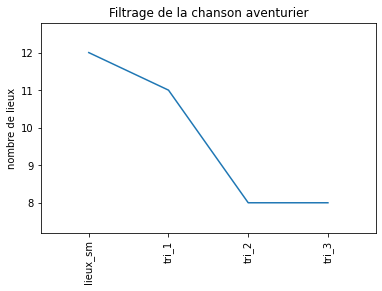

In [13]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [12, 11, 8, 8]
labels = ['lieux_sm', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de la chanson aventurier")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

In [14]:
start2 =time.perf_counter()
loc_md=[]
for texte in f1:
    try:
        doc = nlp_md(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_md.append(entity.text)
    except:
        pass
end2 =time.perf_counter()
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésNettoyage/lieux_lesRicochets_aprésNettoyage_md.json",loc_md)
print("lieux trouvés par le modèle medium : ",len(set(loc_md)))
print(set(loc_md))
print("temps :",end2-start2)
print()
print()

tri_1 = [mot for mot in loc_md if mot not in f2]
test1 = [mot for mot in loc_md if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésFiltrage/lieux_lesRicochets_aprésFiltrage_md.json",tri_3)

lieux trouvés par le modèle medium :  12
{'Saint-Michel', 'Seine', 'pont Alexandre', 'Paris', "viaduc d'Auteuil", 'Grossissait', "pont d l'Alma", "pont d'Iena", 'Parisienne', 'tit Montparnasse', 'pont Mirabeau', 'Île-de-France'}
temps : 0.14274747399986154


nombre lieux qui ne se trouvent pas dans le Glaff :  11
{'Saint-Michel', 'pont Alexandre', 'Paris', "viaduc d'Auteuil", 'Grossissait', "pont d l'Alma", 'Seine', 'Île-de-France', 'tit Montparnasse', 'pont Mirabeau', "pont d'Iena"}

{'Parisienne'}

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  8
{'Saint-Michel', 'pont Alexandre', "viaduc d'Auteuil", "pont d l'Alma", 'Île-de-France', 'tit Montparnasse', 'pont Mirabeau', "pont d'Iena"}

{'Seine', 'Paris', 'Grossissait'}

nombre de lieux obtenu dans la liste finale :  8
{'Saint-Michel', 'pont Alexandre', "viaduc d'Auteuil", "pont d l'Alma", 'Île-de-France', 'tit Montparnasse', 'pont Mirabeau', "pont d'Iena"}

set()


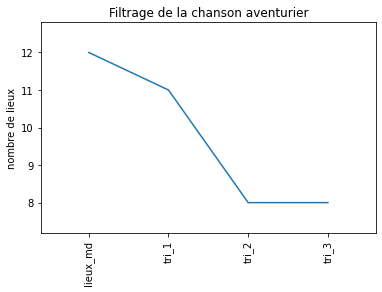

In [15]:
x = [1, 2, 3, 4]
y = [12, 11, 8, 8]
labels = ['lieux_md', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de la chanson aventurier")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

In [16]:
start3 =time.perf_counter()
loc_lg=[]
for texte in f1:
    try:
        doc = nlp_lg(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_lg.append(entity.text)
    except:
        pass
end3 =time.perf_counter()
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésNettoyage/lieux_lesRicochets_aprésNettoyage_lg.json",loc_lg)
print("lieux trouvés par le modèle large : ",len(set(loc_lg)))
print(set(loc_lg))
print("temps :",end3-start3)
print()
print()

tri_1 = [mot for mot in loc_lg if mot not in f2]
test1 = [mot for mot in loc_lg if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésFiltrage/lieux_lesRicochets_aprésFiltrage_lg.json",tri_3)

lieux trouvés par le modèle large :  9
{'Mière Parisienne', 'Saint-Michel', 'pont Alexandre', 'Paris', 'Seine', 'Île-de-France', "viaduc d'Auteuil", 'pont Mirabeau', "pont d'Iena"}
temps : 0.13060308600006465


nombre lieux qui ne se trouvent pas dans le Glaff :  9
{'Mière Parisienne', 'Saint-Michel', 'pont Alexandre', 'Paris', 'Seine', 'Île-de-France', "viaduc d'Auteuil", 'pont Mirabeau', "pont d'Iena"}

set()

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  7
{'Mière Parisienne', 'Saint-Michel', 'pont Alexandre', 'Île-de-France', "viaduc d'Auteuil", 'pont Mirabeau', "pont d'Iena"}

{'Seine', 'Paris'}

nombre de lieux obtenu dans la liste finale :  7
{'Mière Parisienne', 'Saint-Michel', 'pont Alexandre', 'Île-de-France', "viaduc d'Auteuil", 'pont Mirabeau', "pont d'Iena"}

set()


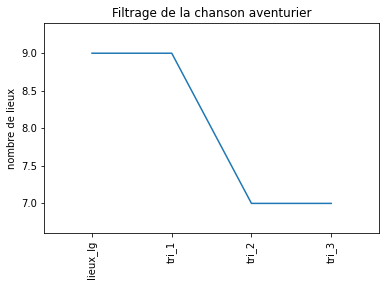

In [17]:
x = [1, 2, 3, 4]
y = [9, 9, 7, 7]
labels = ['lieux_lg', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de la chanson aventurier")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)